In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

1. Analyze only the users and not the admins.
2. The fontsize and the figsize remain the same
3. For each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits
choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [3]:
query = '''
SELECT date(timestamp) AS date,
strftime("%w", timestamp) AS weekday,
strftime("%H", timestamp) AS hour,
COUNT(*) AS commits
FROM checker
WHERE uid LIKE "user_%"
GROUP BY date, hour
ORDER BY date, hour;
'''

In [4]:
df = pd.read_sql(query, con)
df.head()

,date,weekday,hour,commits
0,2020-04-17,5,05,13
1,2020-04-17,5,11,8
2,2020-04-17,5,12,2
3,2020-04-18,6,07,1
4,2020-04-18,6,13,5


In [5]:
hours_column = pd.DataFrame({
    'hour': [f"{h:02d}" for h in range(24)]
})
hours_column

,hour
0,00
1,01
2,02
3,03
4,04
5,05
6,06
7,07
8,08
9,09


In [6]:
graph_data = (df.assign(day_type=lambda x: x['weekday'].apply(
        lambda w: 'weekend' if w in ['0', '6'] else 'working_day')).groupby(['hour', 'day_type'])['commits']
    .mean()
    .unstack()
    .fillna(0)
    .reindex([f"{h:02d}" for h in range(24)], fill_value=0))
graph_data

day_type,weekend,working_day
hour,,
00,2.000000,3.000000
01,6.000000,0.000000
02,0.000000,0.000000
03,1.000000,2.000000
04,0.000000,0.000000
05,2.000000,7.500000
06,0.000000,1.500000
07,4.000000,5.166667
08,7.000000,3.700000


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

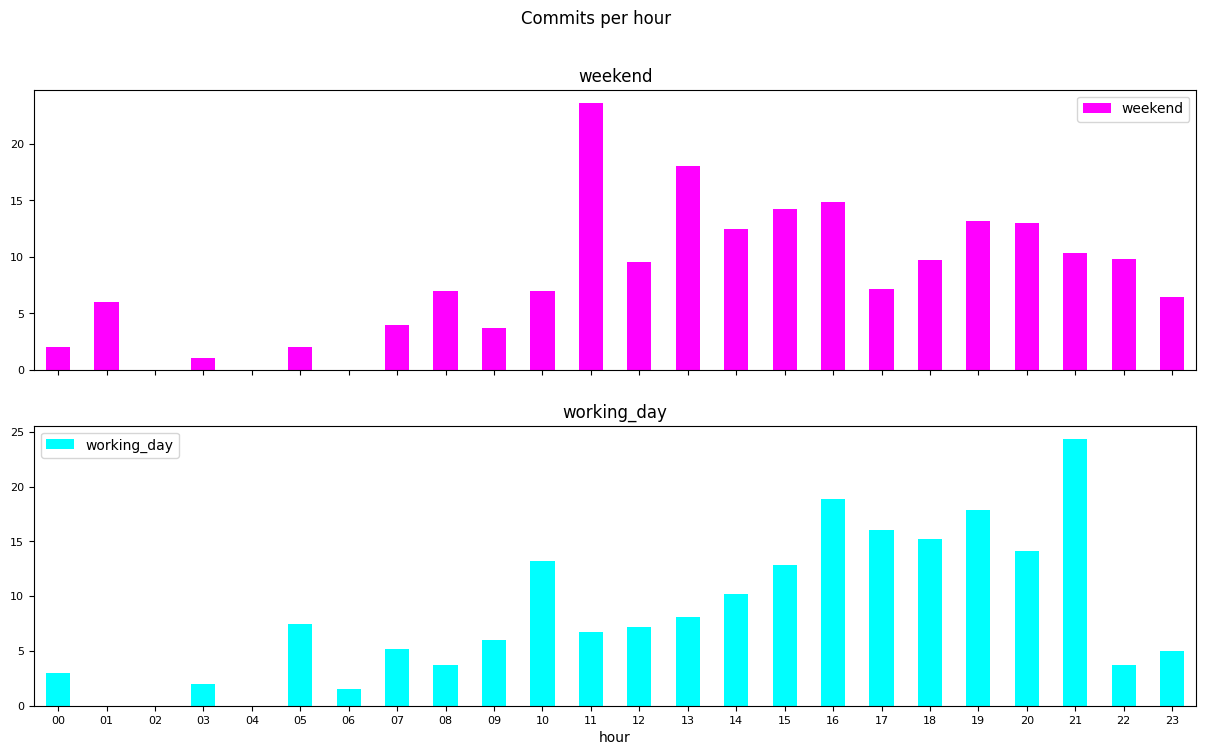

In [7]:
graph_data.plot.bar(
  title='Commits per hour',
  subplots=[('weekend',), ('working_day',)],
  fontsize=8,
  figsize=(15, 8),
  rot=0,
  color={
    'weekend': 'magenta',
    'working_day': 'cyan'
  }
)

In [8]:
con.close()

Q:“Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.\
A: Yes, dynamic is different. This periods have different activity time\
On **weekends the most popular hour is 11** o'clock\
On **working days - 21** o'clock